In [1]:
%run all_code.py
%matplotlib inline

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [4]:
ms75_85 = pd.read_csv('data_safe/ms75_85.csv').drop('Unnamed: 0', axis=1)

In [5]:
ms75_85 = ms75_85[ms75_85['position'] < 51]

In [8]:
for c in ms75_85.columns:
    try:
        ms75_85[c] = pd.to_numeric(ms75_85[c])
    except ValueError:
        continue

In [9]:
ms75_85.columns

Index(['artist', 'avg_position', 'avg_weeks_on_chart', 'chart_date', 'debut',
       'delta_1', 'delta_2', 'key', 'lag_1', 'lag_2', 'move', 'move_2',
       'next_delta', 'next_pos', 'peak', 'position', 'title', 'total_albums',
       'total_credits', 'total_weeks', 'unique_credits', 'weeks_on_chart',
       'year', 'pos_diff'],
      dtype='object')

In [163]:
data = ms75_85
feats = ['position', 'pos_diff', 'delta_1', 'delta_2', 'weeks_on_chart', 'total_albums', 'total_credits', 'peak', 'total_weeks']

drop_cols = [c for c in data.columns if c not in feats]

target = 'move_2'

X = data.drop(drop_cols, axis=1)
y = data.loc[:, target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [165]:
y_train.value_counts(normalize=True)

down    0.400372
up      0.339643
stay    0.259985
Name: move_2, dtype: float64

In [27]:
rfc = RandomForestClassifier()

In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
rfc.score(X_train, y_train)

0.98355022252267477

In [30]:
rfc.score(X_test, y_test)

0.6456573166610341

             precision    recall  f1-score   support

       down       0.67      0.79      0.72      2433
       stay       0.46      0.37      0.41      1488
         up       0.72      0.68      0.70      1997

avg / total       0.64      0.65      0.64      5918

down    2861
up      1870
stay    1187
Name: 0, dtype: int64


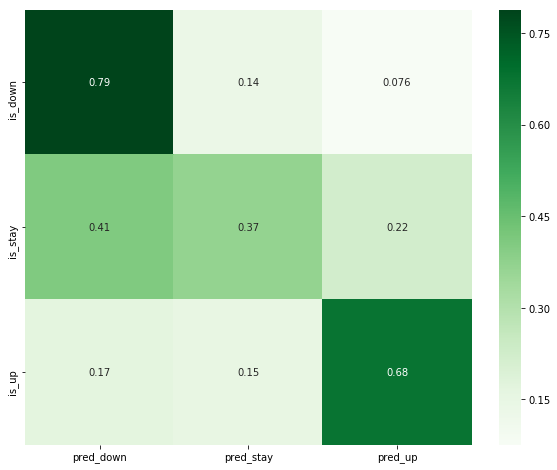

In [31]:
classy(X_test, y_test, rfc)

In [32]:
n_est = [16, 18, 20, 22, 24]
leaf = [20, 25, 30, 35, 40]
param_grid = {'n_estimators': n_est, 'min_samples_leaf' : leaf}

In [34]:
gs1 = GridSearchCV(rfc, param_grid)

In [35]:
gs1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [16, 18, 20, 22, 24], 'min_samples_leaf': [20, 25, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
gs1.score(X_train, y_train)

0.70243929919441161

In [37]:
gs1.score(X_test, y_test)

0.66272389320716463

In [39]:
gs1.best_params_

{'min_samples_leaf': 20, 'n_estimators': 24}

             precision    recall  f1-score   support

       down       0.65      0.86      0.74      2433
       stay       0.52      0.31      0.39      1488
         up       0.75      0.69      0.72      1997

avg / total       0.65      0.66      0.64      5918

down    3197
up      1842
stay    879 
Name: 0, dtype: int64


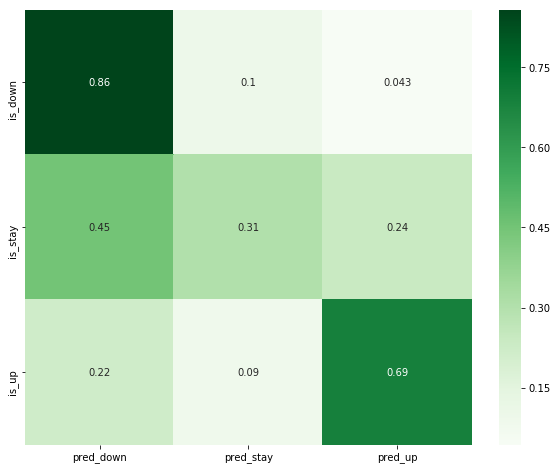

In [38]:
classy(X_test, y_test, gs1)

In [41]:
data = ms75_85
feats = ['position', 'pos_diff', 'delta_1', 'delta_2', 'weeks_on_chart', 'total_albums', 'total_credits', 'peak', 'total_weeks']

drop_cols = [c for c in data.columns if c not in feats]

target = 'move_2'

X = data.drop(drop_cols, axis=1)
y = data.loc[:, target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
svc = SVC()

In [44]:
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.92445496028392771

In [45]:
svc.score(X_test, y_test)

0.633153092260899

             precision    recall  f1-score   support

       down       0.59      0.84      0.70      2354
       stay       0.54      0.29      0.38      1553
         up       0.76      0.65      0.70      2011

avg / total       0.63      0.63      0.61      5918

down    3336
up      1728
stay    854 
Name: 0, dtype: int64


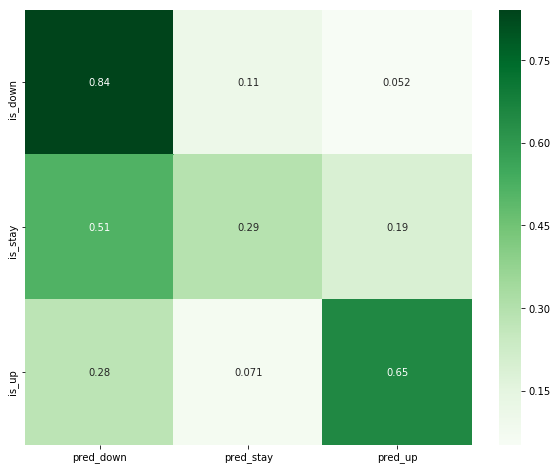

In [46]:
classy(X_test, y_test, svc)

In [47]:
lsvc = LinearSVC()

In [48]:
lsvc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [50]:
lsvc.score(X_train, y_train)

0.61765534336093741

In [51]:
lsvc.score(X_test, y_test)

0.63129435620141938

             precision    recall  f1-score   support

       down       0.60      0.83      0.70      2354
       stay       0.48      0.34      0.40      1553
         up       0.80      0.62      0.70      2011

avg / total       0.64      0.63      0.62      5918

down    3263
up      1575
stay    1080
Name: 0, dtype: int64


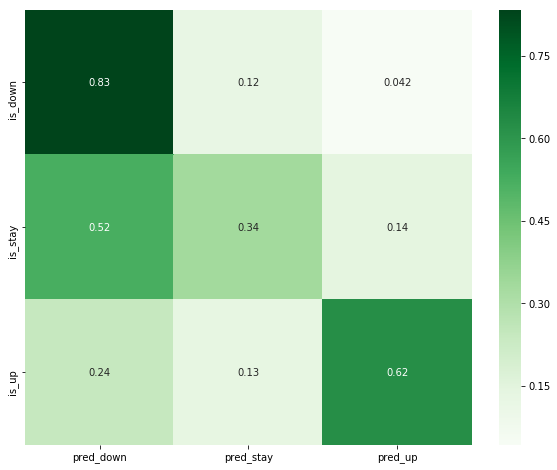

In [52]:
classy(X_test, y_test, lsvc)

In [53]:
ada = AdaBoostClassifier()

In [54]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [55]:
ada.score(X_train, y_train)

0.65303363190806152

In [56]:
ada.score(X_test, y_test)

0.65782358905035487

             precision    recall  f1-score   support

       down       0.64      0.84      0.73      2354
       stay       0.53      0.33      0.41      1553
         up       0.75      0.70      0.72      2011

avg / total       0.65      0.66      0.64      5918

down    3068
up      1876
stay    974 
Name: 0, dtype: int64


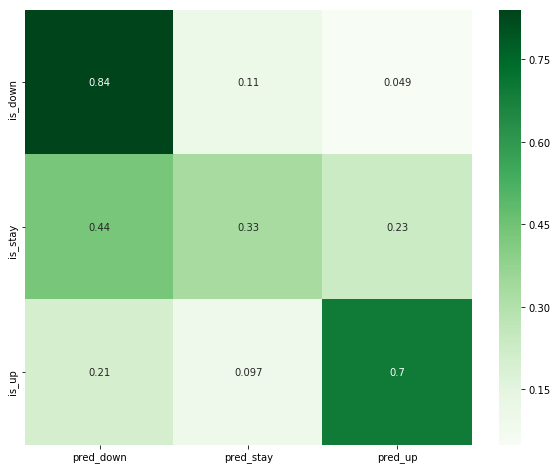

In [58]:
classy(X_test, y_test, ada)

In [73]:
data = ms75_85
feats = ['position', 'pos_diff', 'delta_1', 'delta_2', 'weeks_on_chart', 'total_albums', 'total_credits', 'peak', 'total_weeks']

drop_cols = [c for c in data.columns if c not in feats]

target = 'move_2'

X = data.drop(drop_cols, axis=1)
y = data.loc[:, target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
lr = LogisticRegressionCV()

In [69]:
lr.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [70]:
lr.score(X_train, y_train)

0.64272435355754609

In [71]:
lr.score(X_test, y_test)

0.64278472456911118

             precision    recall  f1-score   support

       down       0.61      0.85      0.71      2349
       stay       0.54      0.26      0.35      1565
         up       0.74      0.70      0.72      2004

avg / total       0.63      0.64      0.62      5918

down    3261
up      1900
stay    757 
Name: 0, dtype: int64


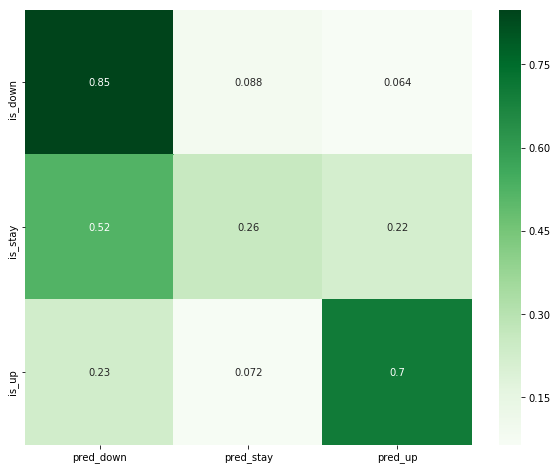

In [72]:
classy(X_test, y_test, lr)

In [77]:
from sklearn.linear_model import SGDClassifier

In [78]:
sgd = SGDClassifier()

In [79]:
sgd.fit(X_train, y_train)
sgd.score(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.41085009295250974

In [80]:
sgd.score(X_test, y_test)

0.40689422102061507

In [81]:
!pip install XGBoost

In [84]:
from xgboost import XGBClassifier

In [85]:
xgb = XGBClassifier()

In [86]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [87]:
xgb.score(X_train, y_train)

0.67410286744408765

In [88]:
xgb.score(X_test, y_test)

0.67962149374788783

             precision    recall  f1-score   support

       down       0.66      0.86      0.74      2443
       stay       0.56      0.32      0.40      1490
         up       0.77      0.73      0.75      1985

avg / total       0.67      0.68      0.66      5918

down    3184
up      1885
stay    849 
Name: 0, dtype: int64


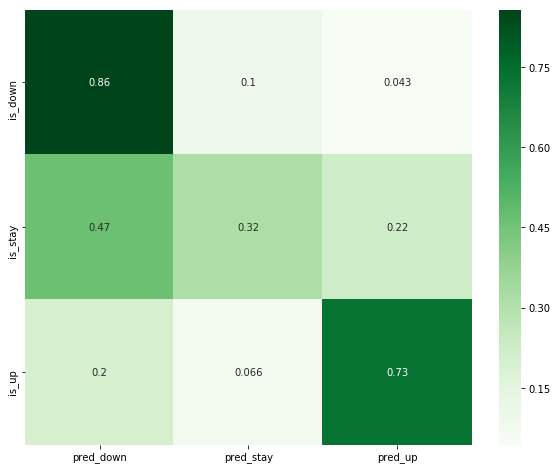

In [89]:
classy(X_test, y_test, xgb)

In [176]:
pd.DataFrame(dict(zip(X.columns,xgb.feature_importances_)), index=['importance']).T.sort_values('importance', ascending=False).reset_index()

,index,importance
0,total_weeks,0.267081
1,weeks_on_chart,0.267081
2,position,0.145963
3,delta_1,0.139752
4,peak,0.091615
5,delta_2,0.049689
6,total_credits,0.015528
7,pos_diff,0.013975
8,total_albums,0.009317


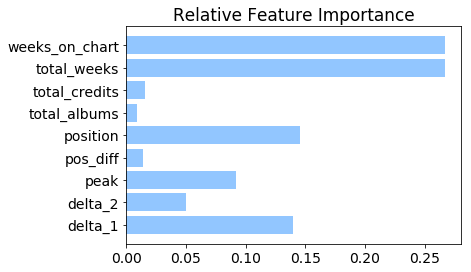

In [186]:
plt.style.use('seaborn-pastel')
plt.title(s='Relative Feature Importance', size=17)
plt.barh(data=pd.DataFrame(dict(zip(X.columns,xgb.feature_importances_)), index=['importance']).T.sort_values('importance', ascending=False).reset_index(), y='index', width='importance')
plt.xticks(size=14)
plt.yticks(size=14);

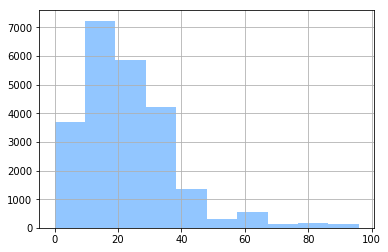

In [188]:
X.total_weeks.hist()

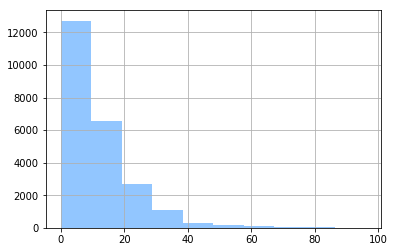

In [189]:
X.weeks_on_chart.hist()

In [90]:
data = ms75_85
feats = ['position', 'pos_diff', 'delta_1', 'delta_2', 'weeks_on_chart', 'total_albums', 'total_credits', 'peak', 'total_weeks']

drop_cols = [c for c in data.columns if c not in feats]

target = 'move'

X = data.drop(drop_cols, axis=1)
y = data.loc[:, target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [91]:
def classy_bin(x, y, model, zero='stay', one='move'):
    y_pred = model.predict(x)
    conf_mat = pd.DataFrame(
        confusion_matrix(y, y_pred),
        index=[f'is_{zero}',f'is_{one}'], columns=[f'pred_{zero}',f'pred_{one}'])
    
    fig = plt.figure(figsize=(10,8))
    sns.heatmap(conf_mat.apply(lambda x: x/x.sum(),axis=1), annot=True, cmap='Greens')
    
    print(classification_report(y, y_pred))

    print(pd.DataFrame(y_pred)[0].value_counts())
    return

In [92]:
rfc = RandomForestClassifier()

In [93]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [94]:
rfc.score(X_train, y_train)

0.98940904737761248

In [97]:
rfc.score(X_test, y_test)

0.73369381547820212

             precision    recall  f1-score   support

          0       0.47      0.36      0.41      1508
          1       0.80      0.86      0.83      4410

avg / total       0.71      0.73      0.72      5918

1    4756
0    1162
Name: 0, dtype: int64


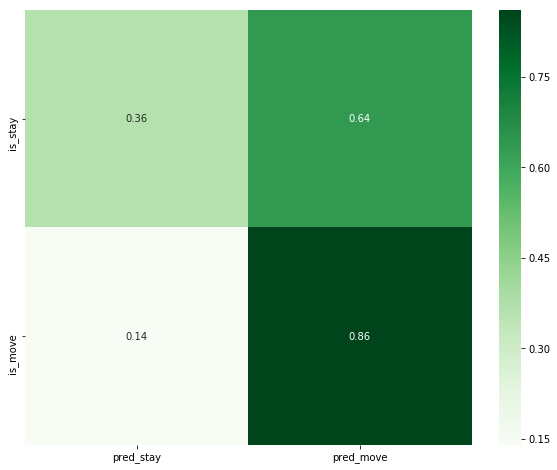

In [98]:
classy_bin(X_test, y_test, rfc)

In [99]:
svc = SVC()

In [100]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
svc.score(X_train, y_train)

0.91859613542898988

In [102]:
svc.score(X_test, y_test)

0.76275768840824598

             precision    recall  f1-score   support

          0       0.60      0.20      0.31      1508
          1       0.78      0.95      0.86      4410

avg / total       0.73      0.76      0.72      5918

1    5404
0    514 
Name: 0, dtype: int64


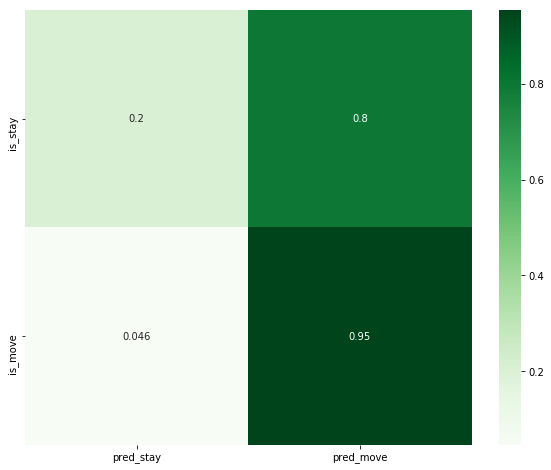

In [103]:
classy_bin(X_test, y_test, svc)

In [105]:
lsvc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [106]:
lsvc.score(X_train, y_train)

0.67021576249225401

In [107]:
lsvc.score(X_test, y_test)

0.67742480567759378

             precision    recall  f1-score   support

          0       0.39      0.46      0.42      1508
          1       0.80      0.75      0.78      4410

avg / total       0.70      0.68      0.69      5918

1    4129
0    1789
Name: 0, dtype: int64


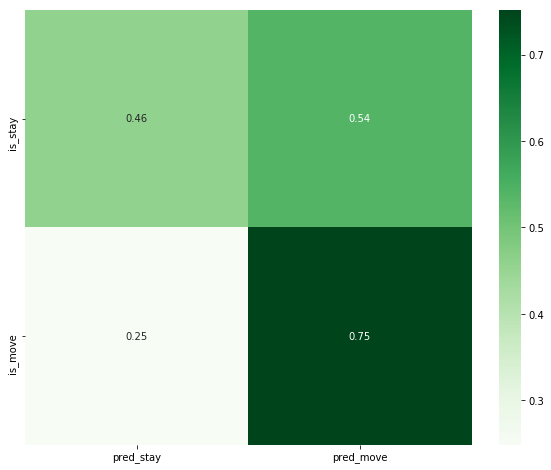

In [108]:
classy_bin(X_test, y_test, lsvc)

In [109]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [110]:
ada.score(X_train, y_train)

0.75832347473381778

In [111]:
ada.score(X_test, y_test)

0.75701250422440014

             precision    recall  f1-score   support

          0       0.59      0.16      0.25      1508
          1       0.77      0.96      0.86      4410

avg / total       0.72      0.76      0.70      5918

1    5512
0    406 
Name: 0, dtype: int64


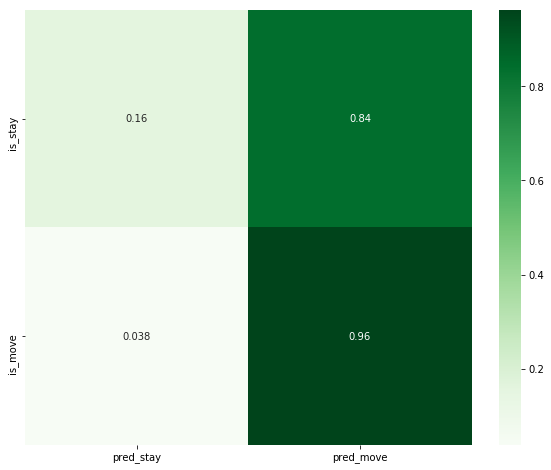

In [112]:
classy_bin(X_test, y_test, ada)

In [113]:
lr.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [114]:
lr.score(X_train, y_train)

0.74683116444143993

In [115]:
lr.score(X_test, y_test)

0.75008448800270366

             precision    recall  f1-score   support

          0       0.58      0.07      0.12      1508
          1       0.76      0.98      0.85      4410

avg / total       0.71      0.75      0.67      5918

1    5747
0    171 
Name: 0, dtype: int64


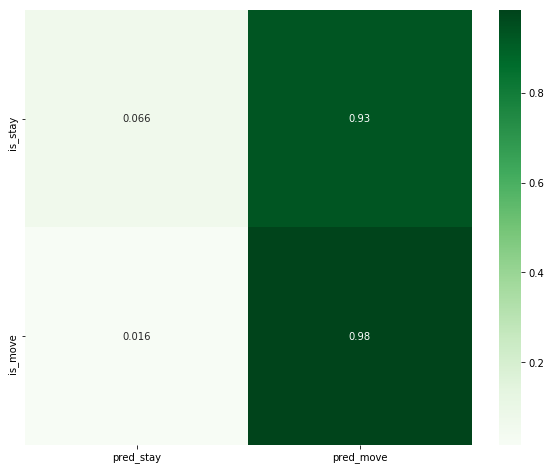

In [116]:
classy_bin(X_test, y_test, lr)

In [123]:
xgb = XGBClassifier()

In [124]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [125]:
xgb.score(X_train, y_train)

0.76959044560869805

In [126]:
xgb.score(X_test, y_test)

0.76748901655964852

             precision    recall  f1-score   support

          0       0.69      0.16      0.26      1508
          1       0.77      0.98      0.86      4410

avg / total       0.75      0.77      0.71      5918

1    5568
0    350 
Name: 0, dtype: int64


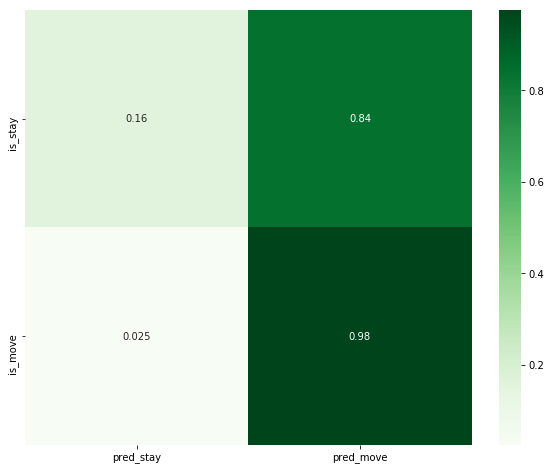

In [127]:
classy_bin(X_test, y_test, xgb)

In [128]:
data = ms75_85
feats = ['position', 'pos_diff', 'delta_1', 'delta_2', 'weeks_on_chart', 'total_albums', 'total_credits', 'peak', 'total_weeks']

drop_cols = [c for c in data.columns if c not in feats]

target = 'move'

X = data.drop(drop_cols, axis=1)
y = data.loc[:, target]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [129]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [130]:
xgb.score(X_train, y_train)

0.76981578502619574

In [131]:
xgb.score(X_test, y_test)

0.76258871240283876

             precision    recall  f1-score   support

          0       0.66      0.16      0.26      1530
          1       0.77      0.97      0.86      4388

avg / total       0.74      0.76      0.70      5918

1    5539
0    379 
Name: 0, dtype: int64


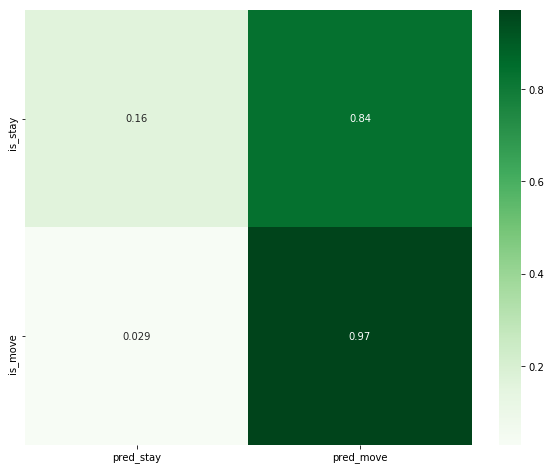

In [132]:
classy_bin(X_test, y_test, xgb)

In [137]:
data = ms75_85[ms75_85['move'] == 1]
feats = ['position', 'pos_diff', 'delta_1', 'delta_2', 'weeks_on_chart', 'total_albums', 'total_credits', 'peak', 'total_weeks']

drop_cols = [c for c in data.columns if c not in feats]

target = 'move_2'

X = data.drop(drop_cols, axis=1)
y = data.loc[:, target]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [138]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [139]:
rfc.score(X_train, y_train)

0.98829965050904123

In [140]:
rfc.score(X_test, y_test)

0.84890610756608931

             precision    recall  f1-score   support

       down       0.83      0.91      0.87      2367
         up       0.88      0.77      0.83      2021

avg / total       0.85      0.85      0.85      4388

down    2616
up      1772
Name: 0, dtype: int64


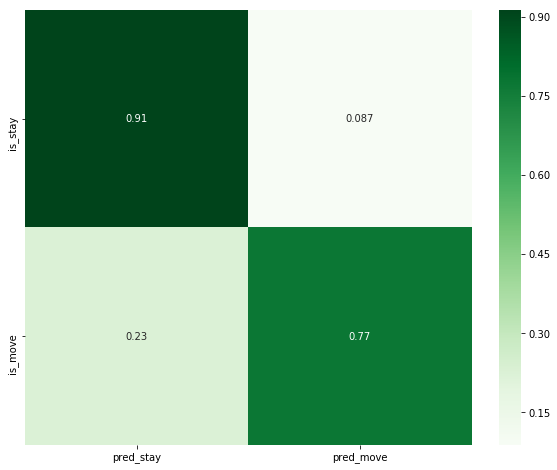

In [142]:
classy_bin(X_test, y_test, rfc)

In [143]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [144]:
svc.score(X_train, y_train)

0.98055006837866587

In [145]:
svc.score(X_test, y_test)

0.81631722880583413

             precision    recall  f1-score   support

       down       0.78      0.92      0.84      2367
         up       0.89      0.69      0.78      2021

avg / total       0.83      0.82      0.81      4388

down    2817
up      1571
Name: 0, dtype: int64


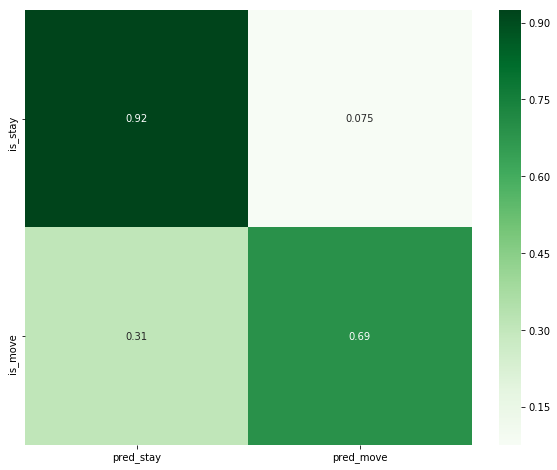

In [146]:
classy_bin(X_test, y_test, svc)

In [147]:
lsvc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [148]:
lsvc.score(X_train, y_train)

0.74722686521805193

In [149]:
lsvc.score(X_test, y_test)

0.75387420237010028

             precision    recall  f1-score   support

       down       0.69      0.97      0.81      2367
         up       0.93      0.50      0.65      2021

avg / total       0.80      0.75      0.74      4388

down    3303
up      1085
Name: 0, dtype: int64


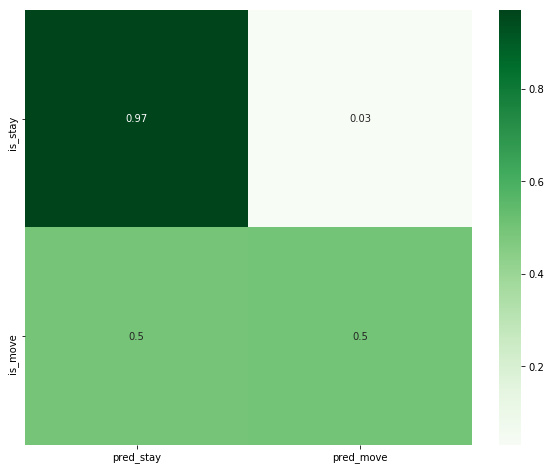

In [150]:
classy_bin(X_test, y_test, lsvc)

In [151]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [152]:
ada.score(X_train, y_train)

0.84485640480170188

In [153]:
ada.score(X_test, y_test)

0.84503190519598903

             precision    recall  f1-score   support

       down       0.82      0.92      0.86      2367
         up       0.89      0.76      0.82      2021

avg / total       0.85      0.85      0.84      4388

down    2659
up      1729
Name: 0, dtype: int64


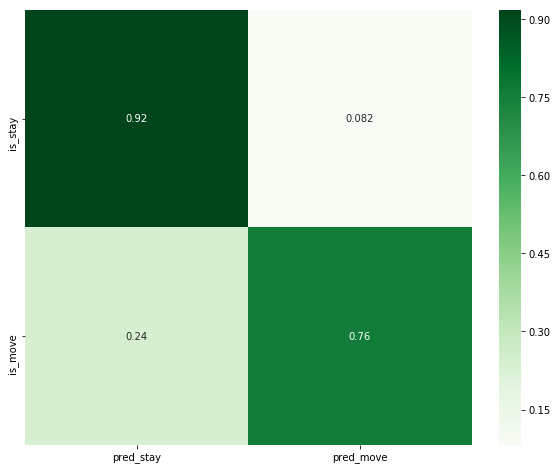

In [154]:
classy_bin(X_test, y_test, ada)

In [155]:
lr.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [156]:
lr.score(X_train, y_train)

0.82745783315605526

In [157]:
lr.score(X_test, y_test)

0.8397903372835005

             precision    recall  f1-score   support

       down       0.81      0.91      0.86      2367
         up       0.88      0.76      0.81      2021

avg / total       0.84      0.84      0.84      4388

down    2650
up      1738
Name: 0, dtype: int64


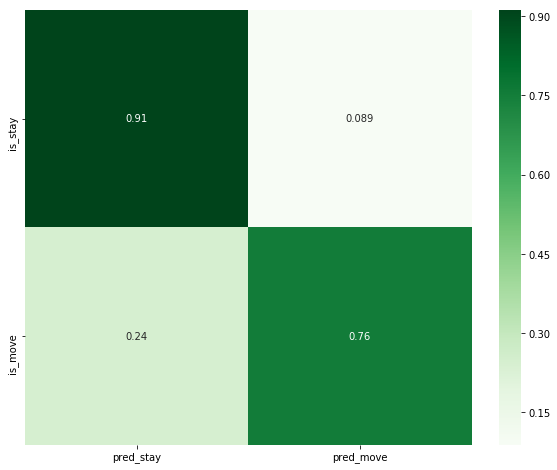

In [158]:
classy_bin(X_test, y_test, lr)

In [159]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [160]:
xgb.score(X_train, y_train)

0.85435344172618144

In [161]:
xgb.score(X_test, y_test)

0.85186873290793075

             precision    recall  f1-score   support

       down       0.82      0.93      0.87      2367
         up       0.90      0.76      0.83      2021

avg / total       0.86      0.85      0.85      4388

down    2681
up      1707
Name: 0, dtype: int64


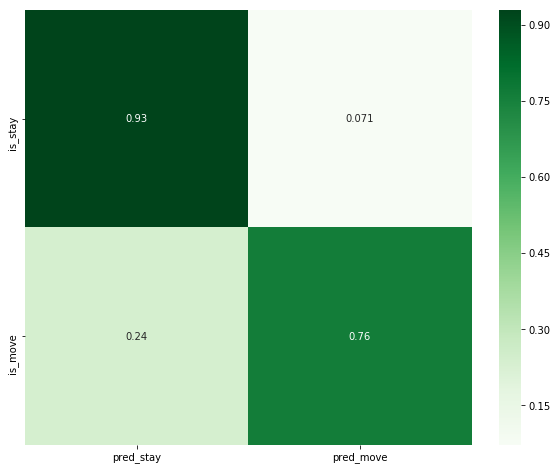

In [162]:
classy_bin(X_test, y_test, xgb)